In [0]:
# import libraries and read iris dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance

# following 2 lines for normalization
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width'])
target = pd.DataFrame(iris.target, columns = ['target'])

clf = RandomForestClassifier(n_estimators=100, random_state=1)

In [0]:
# Function to add new features
# please add some features, for example ratio of sepal length/width, differnce between petal length/width, estimated size of petal(petal length x width x constant?) etc

def add_feature(df):
    df['petal_ratio'] = df.petal_len / df.petal_width
    df['petal_diff'] = df.petal_len - df.petal_width
    return

In [0]:
# call add_feature and Concat data and target for analysis

add_feature(df)
df_all = pd.concat([df, target], axis=1)

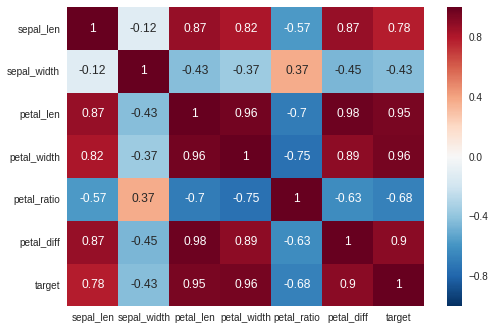

In [0]:
# Let's check correlation between features with heatmap

sns.heatmap(df_all.corr(), center=0, annot=True)

In [0]:
# Split data into train, cross-validation


train_X, val_X, train_y, val_y = train_test_split(df, target, random_state=1)

# Fit model

clf.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [0]:
# Show permutation inmportance

perm = PermutationImportance(clf, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0526 ± 0.0333,petal_width
0.0474 ± 0.0516,petal_len
0 ± 0.0000,petal_diff
0 ± 0.0000,petal_ratio
0 ± 0.0000,sepal_width
0 ± 0.0000,sepal_len


### What to do next ?

Above result was suprising.  Can we assume that

- the information of Sepal Length/Width are not necessary to predict the species of IRIS (at least for Random-Forest), how can we confirm this hypothesis
- other estimator (such as logistic-regression) will show smililar permutation importance result, how can we confirm this hypothesis
- it is not worth trying to create new features from current features. Do we have any disprrof if this hypothesis is not true in general


Please think some hypothesis from observed output, and create/modify strategy to get new finding. We have learned some tools to do that.

- Permutation Importance
- Partial Dependece Plot
- SHAP
- Probability prediction
- Data visualization tools

After finding proper combination of features, try to find best model to predict. In order to select hyper-parameters of estimator, **GridSearchCV** and **RandomizedSearchCV** will help to check the combination.
Try other estimator such as SVC, KNN, xgbost.